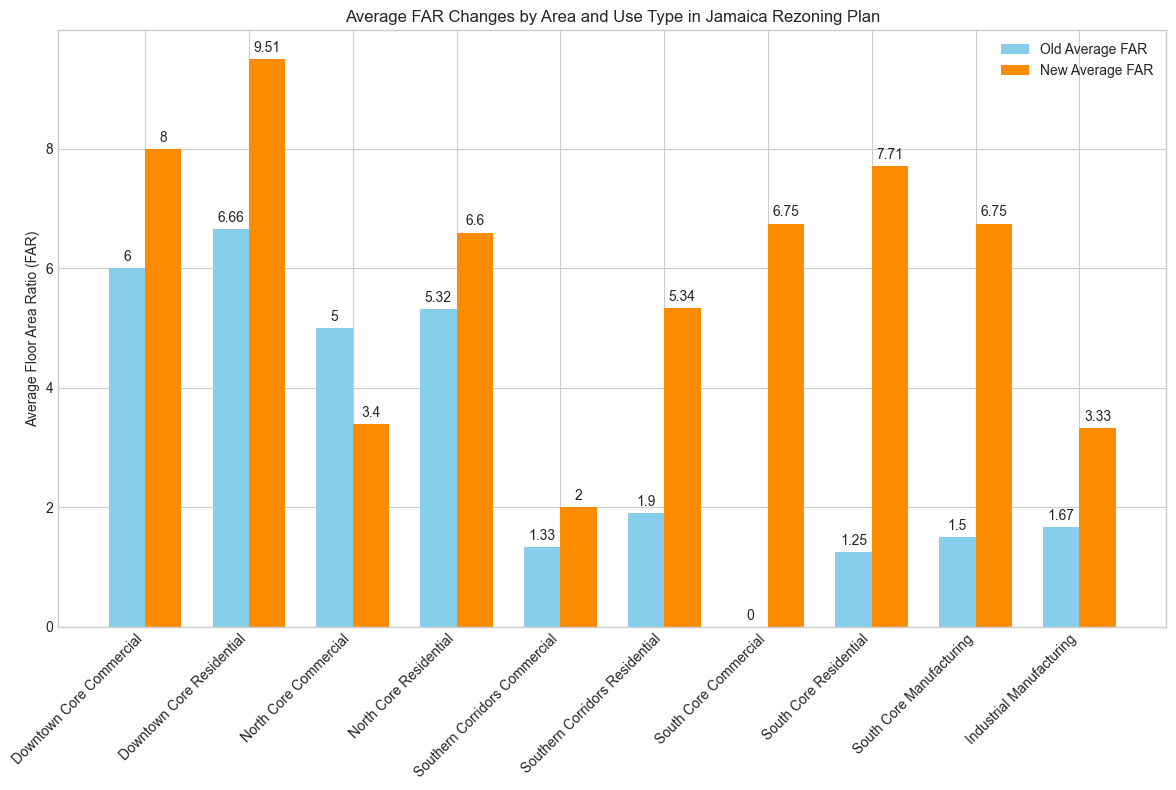

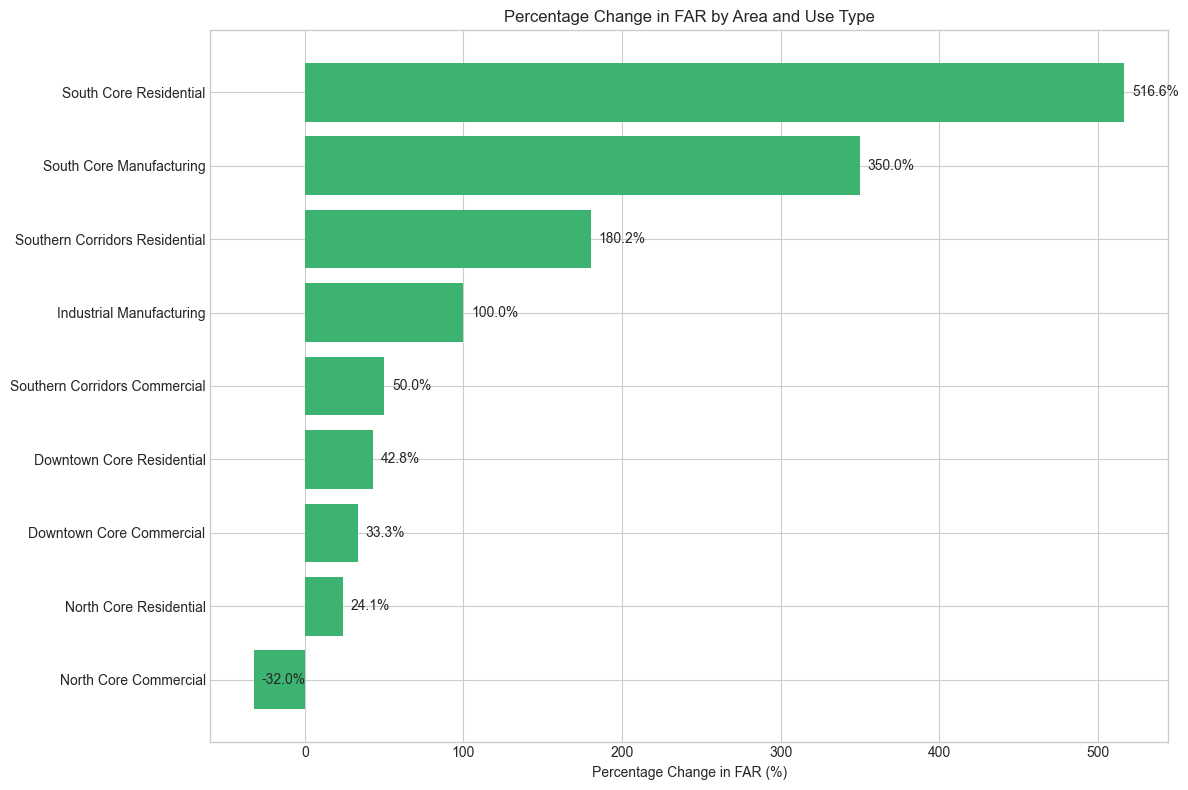

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the analysis
data = {
    'Area': [
        'Downtown Core', 'Downtown Core', 'North Core', 'North Core',
        'Southern Corridors', 'Southern Corridors', 'South Core', 'South Core', 'South Core',
        'Industrial'
    ],
    'Use Type': [
        'Commercial', 'Residential', 'Commercial', 'Residential', 'Commercial',
        'Residential', 'Commercial', 'Residential', 'Manufacturing', 'Manufacturing'
    ],
    'Old Average FAR': [6.0, 6.66, 5.0, 5.32, 1.33, 1.90, 0, 1.25, 1.5, 1.67],
    'New Average FAR': [8.0, 9.51, 3.4, 6.6, 2.0, 5.34, 6.75, 7.71, 6.75, 3.33],
    'Percentage Change': [33.3, 42.8, -32.0, 24.1, 50.0, 180.2, np.nan, 516.6, 350.0, 100.0]
}

df = pd.DataFrame(data)
df['Area_Use'] = df['Area'] + ' ' + df['Use Type']

# Plot 1: Average FAR Changes by Area
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(df['Area_Use']))
width = 0.35

rects1 = ax.bar(x - width/2, df['Old Average FAR'], width, label='Old Average FAR', color='skyblue')
rects2 = ax.bar(x + width/2, df['New Average FAR'], width, label='New Average FAR', color='darkorange')

ax.set_ylabel('Average Floor Area Ratio (FAR)')
ax.set_title('Average FAR Changes by Area and Use Type in Jamaica Rezoning Plan')
ax.set_xticks(x)
ax.set_xticklabels(df['Area_Use'], rotation=45, ha='right')
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('far_changes.png')

# Plot 2: Percentage Change in FAR by Area
df_percent = df.dropna(subset=['Percentage Change']).sort_values('Percentage Change', ascending=False)
plt.figure(figsize=(12, 8))

bars = plt.barh(df_percent['Area_Use'], df_percent['Percentage Change'], color='mediumseagreen')
plt.xlabel('Percentage Change in FAR (%)')
plt.title('Percentage Change in FAR by Area and Use Type')
plt.gca().invert_yaxis() # To display the highest percentage change on top

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', va='center')

plt.tight_layout()
plt.savefig('percentage_far_changes.png')

✅ Interactive FAR change map created: jamaica_far_interactive_map.html
🗺️ Map uses exact FAR values from Jamaica_FAR analysis
📊 All zoning codes and boundaries match official Jamaica Neighborhood Plan
